In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('D:/Machine_learning/supervised/customer-churn_prediction/train.csv')

## Data Description

In [58]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


## Data Preprocessing

### checking for missing values

In [60]:
df.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

### checking for duplication

In [61]:
df.duplicated().any()

False

### categorical variables encoding

In [62]:
df.select_dtypes(include='object').columns

Index(['ID', 'Gender', 'Income', 'Product_Holdings', 'Credit_Category'], dtype='object')

In [63]:
df['ID'].nunique()

6650

In [64]:
# Dropping ID column
df = df.drop('ID', axis=1)

In [65]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Income', 'Product_Holdings', 'Credit_Category'], dtype='object')

In [66]:
for ele in df.select_dtypes(include='object').columns:
    print(ele)
    print(df[ele].value_counts().count())
    print(df[ele].value_counts())
    print('\n')

Gender
2
Male      3612
Female    3038
Name: Gender, dtype: int64


Income
4
10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64


Product_Holdings
3
1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64


Credit_Category
3
Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64




Gender


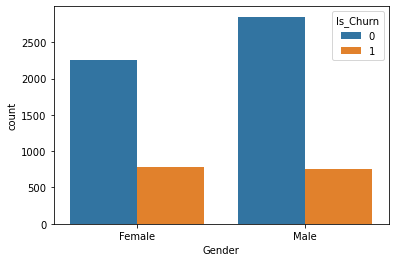

Income


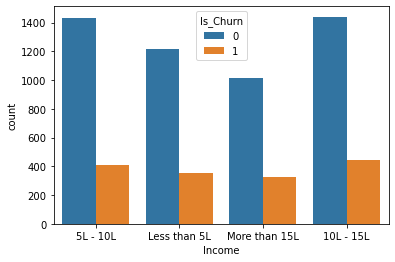

Product_Holdings


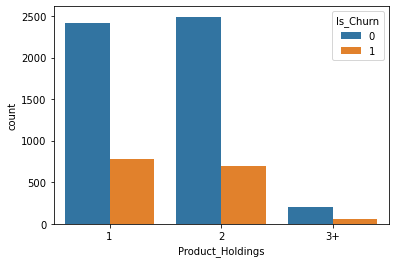

Credit_Category


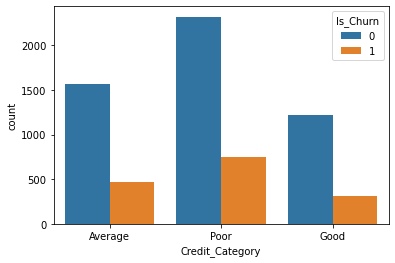

In [67]:
for ele in df.select_dtypes(include='object').columns:
    print(ele)
    sns.countplot(data=df, x=ele, hue='Is_Churn')
    plt.show()

In [68]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [69]:
df['Income'] = df['Income'].astype('category')
df['Income'] = df['Income'].cat.codes
df = pd.get_dummies(df, columns=['Income'], drop_first=True)

In [70]:
df['Product_Holdings'] = df['Product_Holdings'].astype('category')
df['Product_Holdings'] = df['Product_Holdings'].cat.codes
df = pd.get_dummies(df, columns=['Product_Holdings'], drop_first=True)

In [71]:
df['Credit_Category'] = df['Credit_Category'].astype('category')
df['Credit_Category'] = df['Credit_Category'].cat.codes
df = pd.get_dummies(df, columns=['Credit_Category'], drop_first=True)

In [72]:
df.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2
0,36,563266.44,4,0,0,1,0,1,0,0,0,0,0,0
1,53,875572.11,2,1,1,0,0,0,1,0,0,0,0,1
2,35,701607.06,2,1,0,0,0,0,0,1,1,0,0,1
3,43,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1
4,39,893146.23,1,1,1,1,0,0,0,1,0,0,1,0


## Five Number Summary

In [74]:
df.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128,0.543158,0.277744,0.236541,0.202256,0.478496,0.040301,0.230226,0.462556
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586,0.498171,0.447920,0.424990,0.401712,0.499575,0.196678,0.421009,0.498633
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


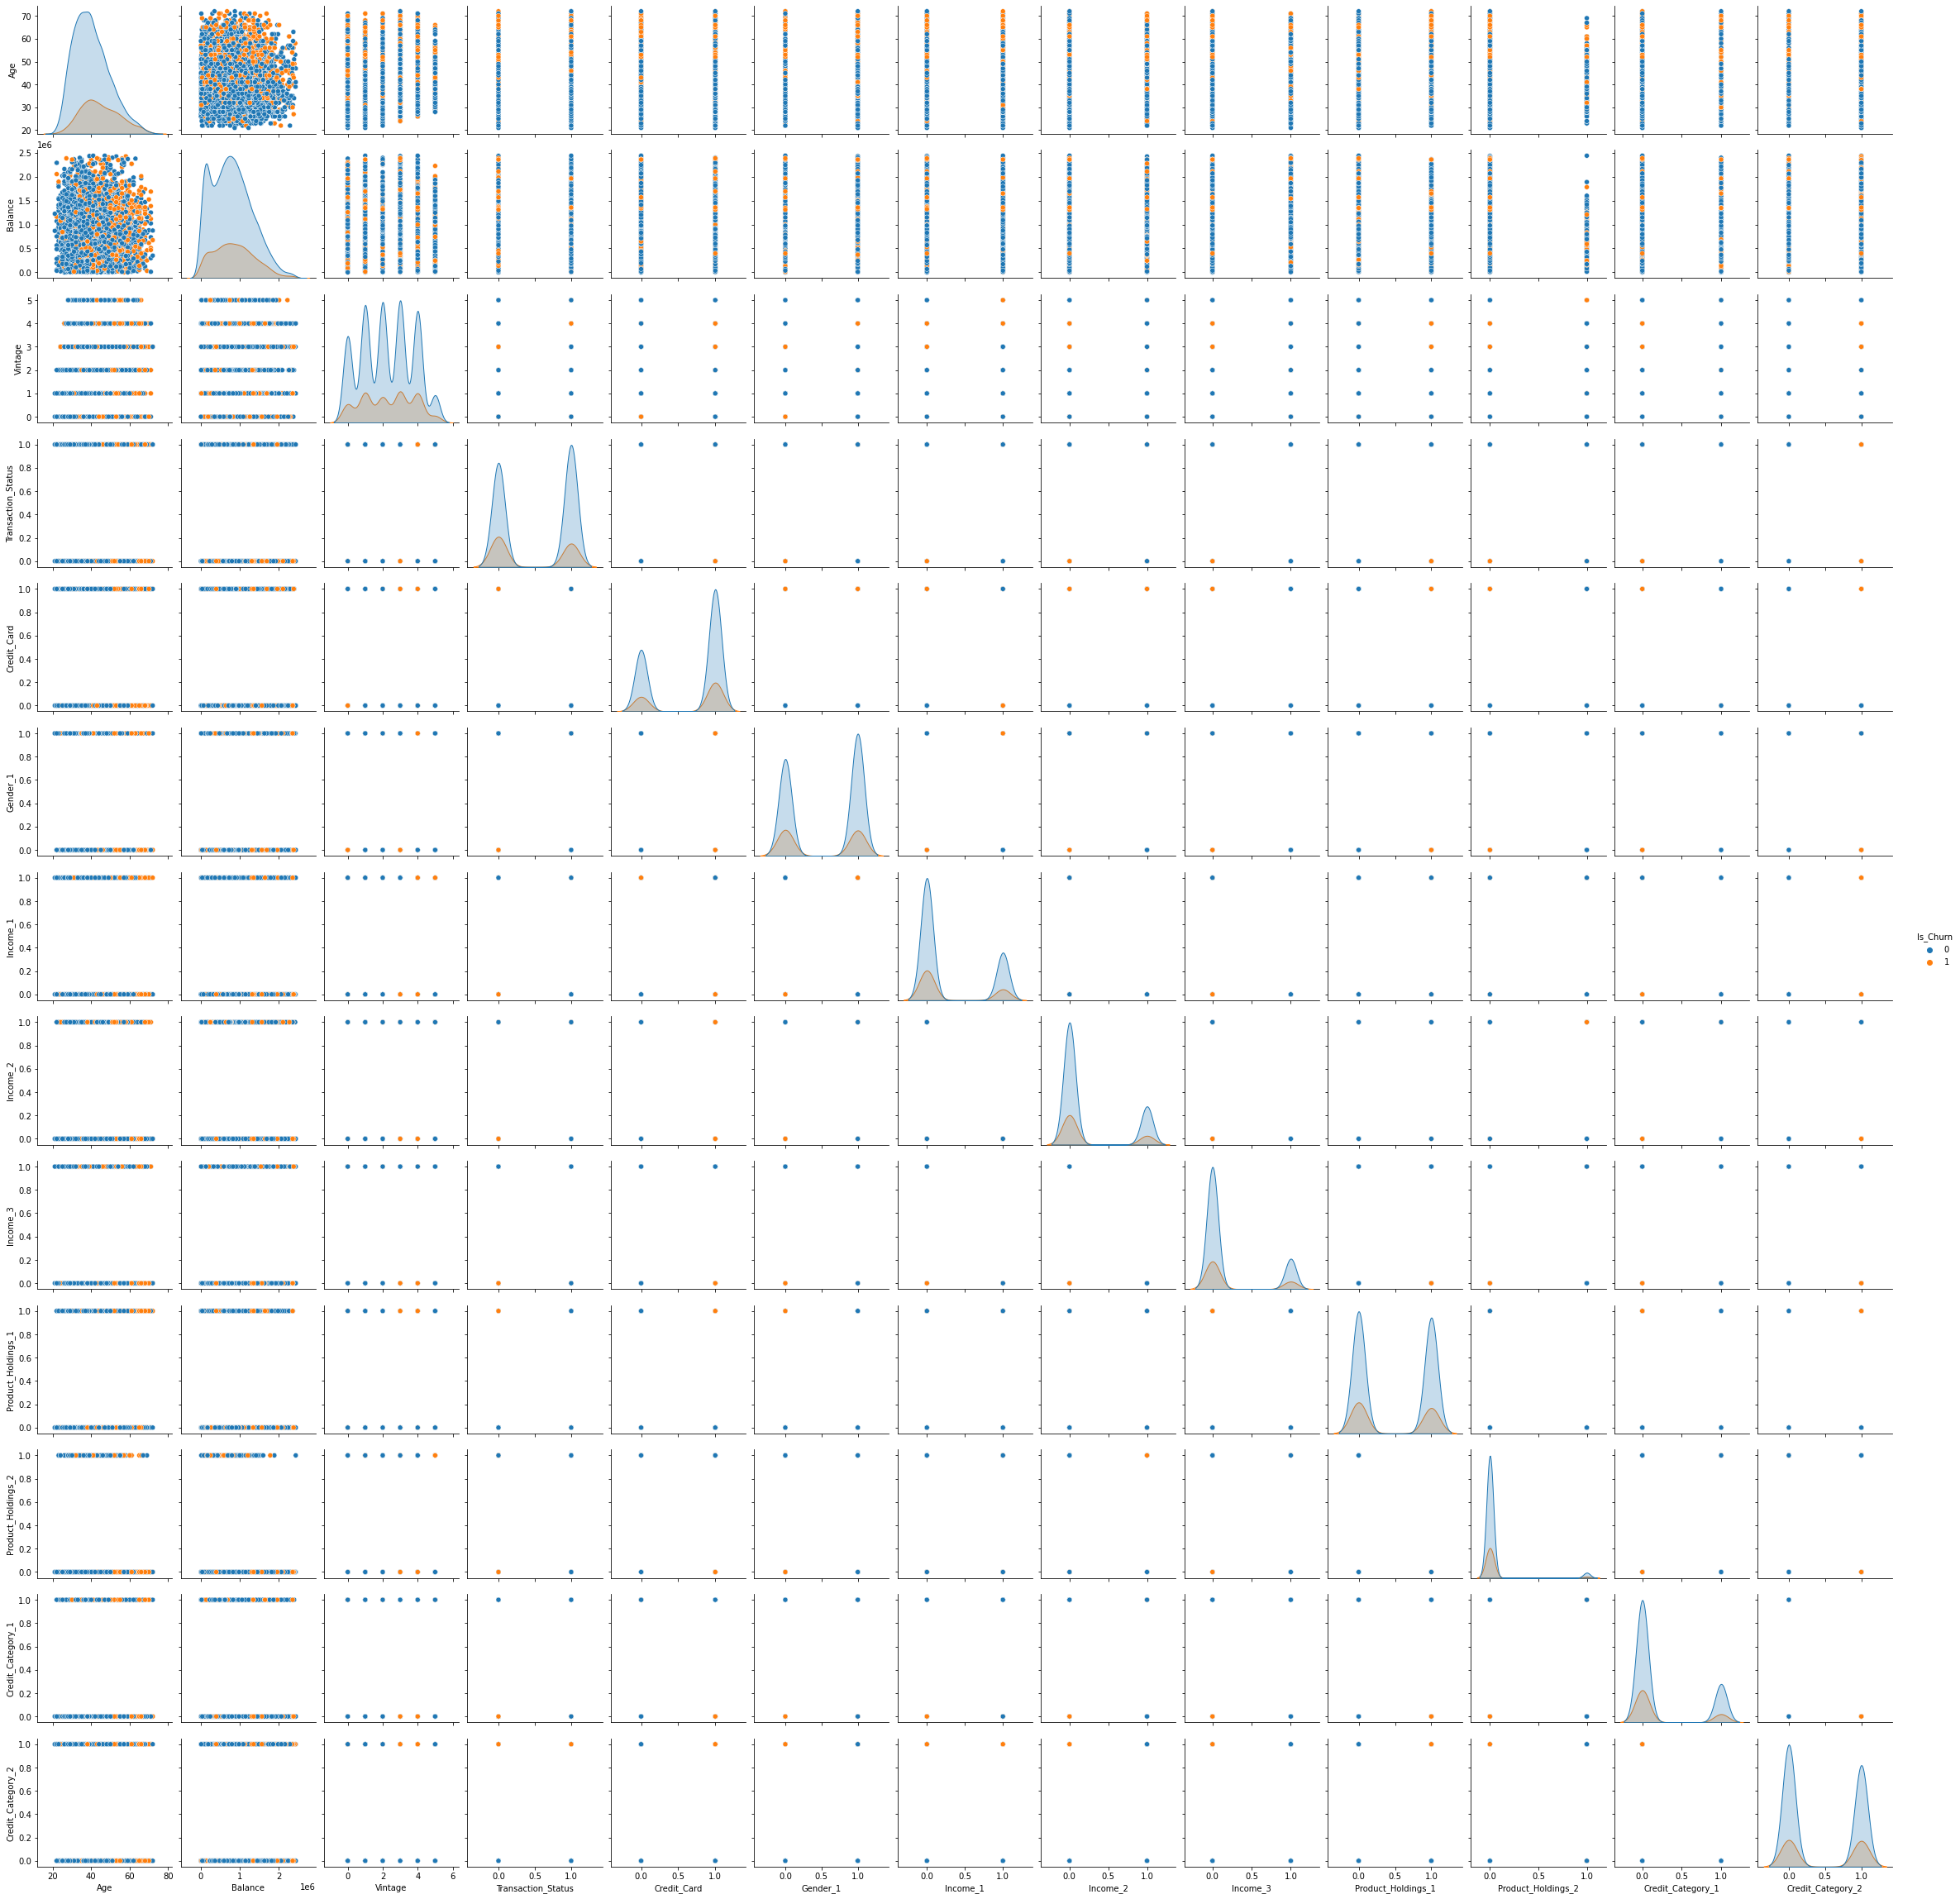

In [75]:
sns.pairplot(df, hue='Is_Churn')

In [76]:
df.skew()

Age                   0.555171
Balance               0.464460
Vintage               0.021421
Transaction_Status   -0.063204
Credit_Card          -0.696287
Is_Churn              1.275912
Gender_1             -0.173317
Income_1              0.992688
Income_2              1.240207
Income_3              1.482823
Product_Holdings_1    0.086114
Product_Holdings_2    4.676034
Credit_Category_1     1.281948
Credit_Category_2     0.150230
dtype: float64